In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from final_project_code import FinalProject 

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
# from sklearn.metrics.pairwise import rbf_kernel
FP = FinalProject()

In [7]:
Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_2953/139095848.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [8]:
df = Rvss[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [9]:
result = FP.create_balanced_data(df)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [10]:
FP = FinalProject()
train, validate, test = FP.split_data(result)

In [11]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [13]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols=['TotalWorkers','TotalPower']
cols = ['logWorkers', 'logPower']
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)

(2871, 2)
(2, 1)


In [15]:
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(2871, 1)


In [16]:
from final_project_code import NR
NR = NR() 
NR.regress(y_train, X_train[cols], beta_old )

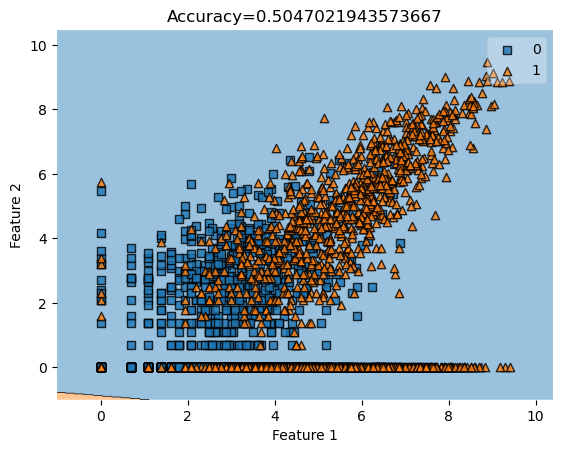

In [17]:
y_train = y_train.reshape(-1)
plot_decision_regions(X_train[cols].to_numpy(), y_train, clf=NR
                    #   filler_feature_values={2:value},
                    #   filler_feature_ranges={2:width}
                      )
mypredict = NR.predict(X_train[cols].to_numpy())
title = plt.gca().set(title=f"Accuracy={(mypredict==y_train).mean()}",
                      xlabel="Feature 1",
                      ylabel="Feature 2")